## Tools

In [72]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style("darkgrid")

## Dataset

In [73]:
data = pd.read_csv("data.csv")
data.replace("M", "B")
#print(data["diagnosis"])

for i in range (len (data)):
    if data.loc[i, "diagnosis"] == 'M':
        data.loc[i, "diagnosis"] = 1
    else:
        data.loc[i, "diagnosis"] = 0
data.head(30)



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


## Basic EDA

Benign = 357
Malign = 212


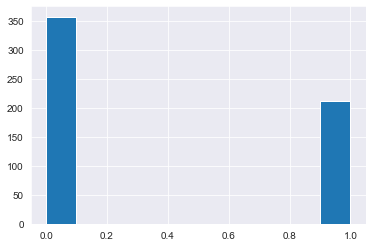

In [74]:
data["diagnosis"].hist()
numOfMalign = 0
numOfBenign = 0
for i in range (len (data)):
    if data.loc[i, "diagnosis"] == 1:
        numOfMalign += 1
    else:
        numOfBenign += 1
print("Benign = "+ str(numOfBenign))
print("Malign = " + str(numOfMalign))


<AxesSubplot:>

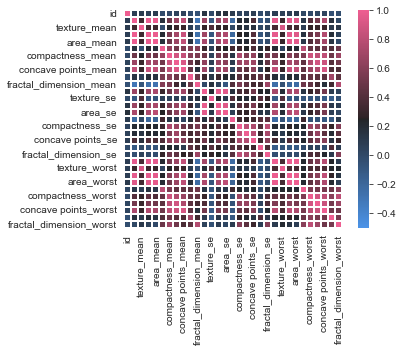

In [75]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [76]:
data = data[["radius_mean", "texture_mean", "smoothness_mean", "diagnosis"]]
data.head(10)

,radius_mean,texture_mean,smoothness_mean,diagnosis
0,17.99,10.38,0.11840,1
1,20.57,17.77,0.08474,1
2,19.69,21.25,0.10960,1
3,11.42,20.38,0.14250,1
4,20.29,14.34,0.10030,1
5,12.45,15.70,0.12780,1
6,18.25,19.98,0.09463,1
7,13.71,20.83,0.11890,1
8,13.00,21.82,0.12730,1
9,12.46,24.04,0.11860,1


<AxesSubplot:xlabel='smoothness_mean', ylabel='Count'>

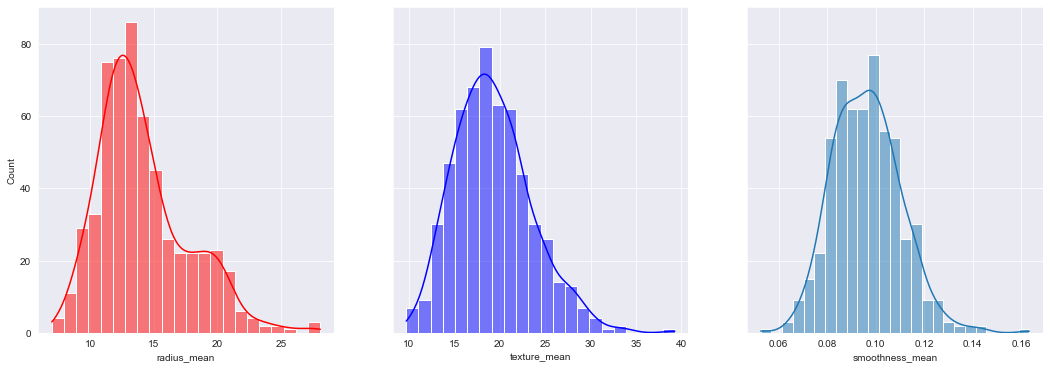

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="radius_mean", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="texture_mean", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="smoothness_mean", kde=True)


## Calculate P(Y=y) for all possible y

In [78]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.

In [79]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [80]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Splitting the DataFrame into Test and Train

In [81]:
def TrainTestSplit(df, test_size):
    testSampleSize = len(df) * test_size
    if (testSampleSize - int(testSampleSize)) >= 0.5:
        testSampleSize =  int(testSampleSize) + 1
    else:
        testSampleSize = int(testSampleSize)
    indices = []
    trainArr = []
    testArr = []
    count = 0
    for i in range(testSampleSize):
        y = random.randint(0, len(df))
        while y in indices:
            y = random.randint(0, len(df))
        indices.append(y)
        count += 1
    
    for i in indices:
        testArr.append(df.iloc[i:i+1])
    for i in range(len(df)):
        if i not in indices:
            trainArr.append(df.iloc[i:i+1])
    return pd.concat(trainArr).sort_index(ascending = True), pd.concat(testArr).sort_index(ascending = True)

## Test Gaussian model

In [86]:
from sklearn.model_selection import train_test_split
train, test = TrainTestSplit(data, test_size= 0.2)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

Y_pred_bool  = []
Y_test_bool = []
for i in range (len(Y_pred)):
    Y_pred_bool.append(bool(Y_pred[i]))
for i in range(len(Y_test)):
    Y_test_bool.append(bool(Y_test[i]))
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test_bool, Y_pred_bool))
print(f1_score(Y_test_bool, Y_pred_bool))

[[63  3]
 [ 7 41]]
0.8913043478260869


## Convert continuous features to Categorical features

In [ ]:
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 3, labels = [0,1,2])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 3, labels = [0,1,2])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data.head(10)

KeyError: 'mean_radius'

## Approach 2: Calculate P(X=x|Y=y) categorically

In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [ ]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Test Categorical model

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[38  2]
 [ 5 69]]
0.9517241379310345
